# Wind Turbine Output
*************************
During this purcess, we had to research how to produce a model that would predict accurately wind power output from wind speed values as the form of a predetermined dataset. The dataset waqs given, which was called powerproduction and it would be read in through the model that would be created. 

#### Wind Speed and Power
Generally Wind is measured in what is called anemometers and this can record wind power, direction and strengths of gusts. The normal unit of wind speed is the know which is knot(nautical mile per hour = 0.51 m sec-1 = 1.15 mph).

Wind Speed Power(Wind Energy) on the other hand is the use of wind to provide mechanical power through wind turbines to turn electric generators for electrical power. Wind power is a popular sustainable, renewable source of power that has a much smaller impact on the environment compared to burning fossil fuels.


### Model: Linear Regression with Keras

Regression is Machine learning algorithm used to predict a label from the data provided. It works best by producing a  model that represents the ideal fit to meet the data model. There are a certain number of factors applied to this which are Input, Hidden and Output Layers. 

* Input Layer is the data fed into it and the number of neurons are predicted here.

* Hidden Layers are middle layers between the 2 layers(Input and Output). The deep neural networks learn about both with data that it is given.

* Output Layer is the final check is made and is extraxted here. The output will have finally one neuron.



### Neural Networks
Neural Networks are a number of algorithms that mimic how the human mind can operate to release the relationship with amounts of data that is given. It is a type of Machine learning which can model this.

The Steps will show how the Model was Design in Details with more information in the steps.

#### Steps:
    1) Loading in Libaries
    2) Loading in Dataset and assigning to variables
    3) Print out the Dta on Screen
    4) Building the Deep Learning Regression Model
    5) Check the loss
    6) Predict on the Test Data and Compute Evaluation Metrics

In [1]:
# Imports
# Neural networks.
import tensorflow.keras as kr

# Numerical arrays
import numpy as np

# Data frames.
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

In [2]:
# Using A style to format the Size of the Graph that will be displayed.
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

In [3]:
# Reading in the Data from a File
df = pd.read_csv('powerproduction.csv')
# Removing the Zeros as there is no point having null values
df.drop(df.index[df['power'] == 0], inplace = True)
# Assign the X and y values to speed and power
X=df[['speed']]
y=df[['power']]
# printing out the table
df


,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


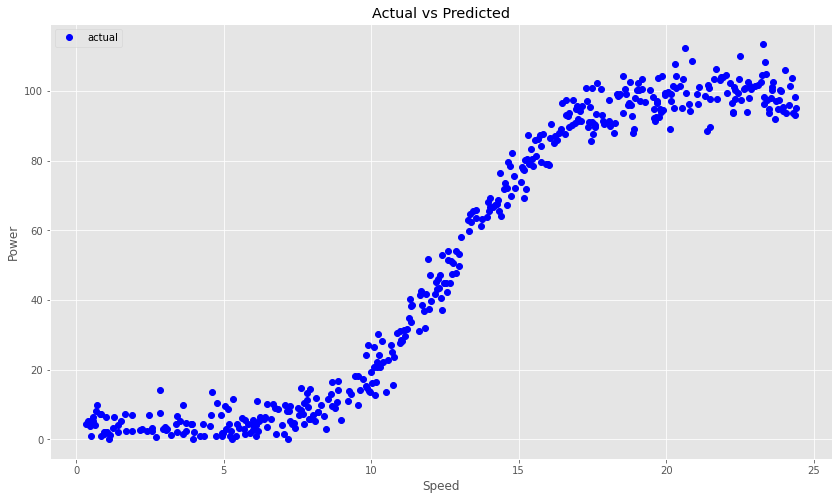

In [4]:
# Plot the predictions
plt.title('Actual vs Predicted')
plt.plot(X, y,"o",color="blue",label='actual')

plt.xlabel("Speed")
plt.ylabel("Power")
plt.legend()

### Model: Linear 

#### Arguments in the Add Method
* Dense: Implements the Operation. Its a TReugular Densely-connected NN layer.
* activation : Activation function to use. If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).
* units: Positive integer, dimensionality of the output space.
* kernel_initializer: Initializer for the kernel weights matrix.
* bias_initializer: Initializer for the Bias Vector.
* Input shape: 2D input with shape.

In [5]:
# Model 
# Sequential groups a linear stack of layers into a tf.keras.Model.
# Dense: Those are the basic layers made with weighted neurons that form the perceptron. 
# An entire perceptron could be built with these type of layers.
# A `Sequential` model and add a Dense layer as the first layer.
# We can piece it all together by adding each layer:

# The model expects rows of data with 1 variables (the input_dim=8 argument)
# The first hidden layer has 3 nodes and uses the linear activation function.
# The second hidden layer has 3 nodes and uses the linear activation function.
# The output layer has one node and uses the sigmoid activation function.
model = kr.models.Sequential()
# For a single-input model with 3 classes (binary classification):
model.add(kr.layers.Dense(3, input_shape=(1,), activation='sigmoid', kernel_initializer="ones", bias_initializer="zeros"))

model.add(kr.layers.Dense(3, input_shape=(1,), activation='linear', kernel_initializer="ones", bias_initializer="zeros"))

model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))

model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Train the model, iterating on the data in batches of 10 samples
# x: Input data
# y: Target Data
# epoachs: No. of epoachs to train the model. An iteration over the entire x and y data provided.
# batch_size: Number of samples per gradient update.
model.fit(X,y, epochs=1000, batch_size=10)

Train on 451 samples
Epoch 1/1000
451/451 [==============================] - 1s 3ms/sample - loss: 4526.2604
Epoch 2/1000
451/451 [==============================] - 0s 122us/sample - loss: 4442.0432
Epoch 3/1000
451/451 [==============================] - 0s 129us/sample - loss: 4363.1985
Epoch 4/1000
451/451 [==============================] - 0s 142us/sample - loss: 4284.7052
Epoch 5/1000
451/451 [==============================] - 0s 126us/sample - loss: 4205.8478
Epoch 6/1000
451/451 [==============================] - 0s 115us/sample - loss: 4122.9138
Epoch 7/1000
451/451 [==============================] - 0s 111us/sample - loss: 4038.6218
Epoch 8/1000
451/451 [==============================] - 0s 124us/sample - loss: 3951.2708
Epoch 9/1000
451/451 [==============================] - 0s 113us/sample - loss: 3858.6995
Epoch 10/1000
451/451 [==============================] - 0s 124us/sample - loss: 3766.0693
Epoch 11/1000
451/451 [==============================] - 0s 135us/sample - loss:

451/451 [==============================] - 0s 115us/sample - loss: 26.1617
Epoch 183/1000
451/451 [==============================] - 0s 106us/sample - loss: 25.9595
Epoch 184/1000
451/451 [==============================] - 0s 111us/sample - loss: 26.6462
Epoch 185/1000
451/451 [==============================] - 0s 109us/sample - loss: 25.8807
Epoch 186/1000
451/451 [==============================] - 0s 120us/sample - loss: 25.6656
Epoch 187/1000
451/451 [==============================] - 0s 135us/sample - loss: 25.6445
Epoch 188/1000
451/451 [==============================] - 0s 133us/sample - loss: 25.5741
Epoch 189/1000
451/451 [==============================] - 0s 109us/sample - loss: 25.3687
Epoch 190/1000
451/451 [==============================] - 0s 109us/sample - loss: 25.1866
Epoch 191/1000
451/451 [==============================] - 0s 118us/sample - loss: 25.1911
Epoch 192/1000
451/451 [==============================] - 0s 122us/sample - loss: 25.1683
Epoch 193/1000
451/451 [=

451/451 [==============================] - 0s 109us/sample - loss: 18.6371
Epoch 364/1000
451/451 [==============================] - 0s 109us/sample - loss: 18.7015
Epoch 365/1000
451/451 [==============================] - 0s 122us/sample - loss: 18.6747
Epoch 366/1000
451/451 [==============================] - 0s 113us/sample - loss: 18.6448
Epoch 367/1000
451/451 [==============================] - 0s 122us/sample - loss: 18.6072
Epoch 368/1000
451/451 [==============================] - 0s 129us/sample - loss: 18.5663
Epoch 369/1000
451/451 [==============================] - 0s 122us/sample - loss: 18.6724
Epoch 370/1000
451/451 [==============================] - 0s 137us/sample - loss: 18.5165
Epoch 371/1000
451/451 [==============================] - 0s 129us/sample - loss: 18.6449
Epoch 372/1000
451/451 [==============================] - 0s 109us/sample - loss: 18.5437
Epoch 373/1000
451/451 [==============================] - 0s 113us/sample - loss: 18.5327
Epoch 374/1000
451/451 [=

Epoch 545/1000
451/451 [==============================] - 0s 111us/sample - loss: 17.2118
Epoch 546/1000
451/451 [==============================] - 0s 111us/sample - loss: 17.3841
Epoch 547/1000
451/451 [==============================] - 0s 122us/sample - loss: 17.4609
Epoch 548/1000
451/451 [==============================] - 0s 131us/sample - loss: 17.4092
Epoch 549/1000
451/451 [==============================] - 0s 124us/sample - loss: 17.1737
Epoch 550/1000
451/451 [==============================] - 0s 131us/sample - loss: 17.2265
Epoch 551/1000
451/451 [==============================] - 0s 111us/sample - loss: 17.4113
Epoch 552/1000
451/451 [==============================] - 0s 115us/sample - loss: 17.2263
Epoch 553/1000
451/451 [==============================] - 0s 111us/sample - loss: 17.1796
Epoch 554/1000
451/451 [==============================] - 0s 109us/sample - loss: 17.1768
Epoch 555/1000
451/451 [==============================] - 0s 106us/sample - loss: 17.2166
Epoch 556/

451/451 [==============================] - 0s 109us/sample - loss: 16.9641
Epoch 727/1000
451/451 [==============================] - 0s 111us/sample - loss: 16.8707
Epoch 728/1000
451/451 [==============================] - 0s 115us/sample - loss: 16.7482
Epoch 729/1000
451/451 [==============================] - 0s 109us/sample - loss: 16.9710
Epoch 730/1000
451/451 [==============================] - 0s 109us/sample - loss: 17.0598
Epoch 731/1000
451/451 [==============================] - 0s 106us/sample - loss: 16.8542
Epoch 732/1000
451/451 [==============================] - 0s 106us/sample - loss: 16.8935
Epoch 733/1000
451/451 [==============================] - 0s 109us/sample - loss: 16.8888
Epoch 734/1000
451/451 [==============================] - 0s 106us/sample - loss: 17.0533
Epoch 735/1000
451/451 [==============================] - 0s 113us/sample - loss: 17.0294
Epoch 736/1000
451/451 [==============================] - 0s 109us/sample - loss: 16.9621
Epoch 737/1000
451/451 [=

Epoch 908/1000
451/451 [==============================] - 0s 109us/sample - loss: 16.8032
Epoch 909/1000
451/451 [==============================] - 0s 115us/sample - loss: 16.8375
Epoch 910/1000
451/451 [==============================] - 0s 106us/sample - loss: 16.9580
Epoch 911/1000
451/451 [==============================] - 0s 106us/sample - loss: 17.0291
Epoch 912/1000
451/451 [==============================] - 0s 111us/sample - loss: 16.8217
Epoch 913/1000
451/451 [==============================] - 0s 109us/sample - loss: 16.8076
Epoch 914/1000
451/451 [==============================] - 0s 109us/sample - loss: 16.9213
Epoch 915/1000
451/451 [==============================] - 0s 111us/sample - loss: 16.8075
Epoch 916/1000
451/451 [==============================] - 0s 109us/sample - loss: 16.8743
Epoch 917/1000
451/451 [==============================] - 0s 109us/sample - loss: 16.9402
Epoch 918/1000
451/451 [==============================] - 0s 109us/sample - loss: 16.9460
Epoch 919/

451/451 [==============================] - 0s 109us/sample - loss: 16.8029
Epoch 1000/1000
451/451 [==============================] - 0s 111us/sample - loss: 16.8888


In [7]:
# Evaluate the model on the data using `evaluate`
loss = model.evaluate(X,y)

451/451 [==============================] - 0s 175us/sample - loss: 16.7175


In [8]:
# Predict Model Data
y_pred= model.predict(X)

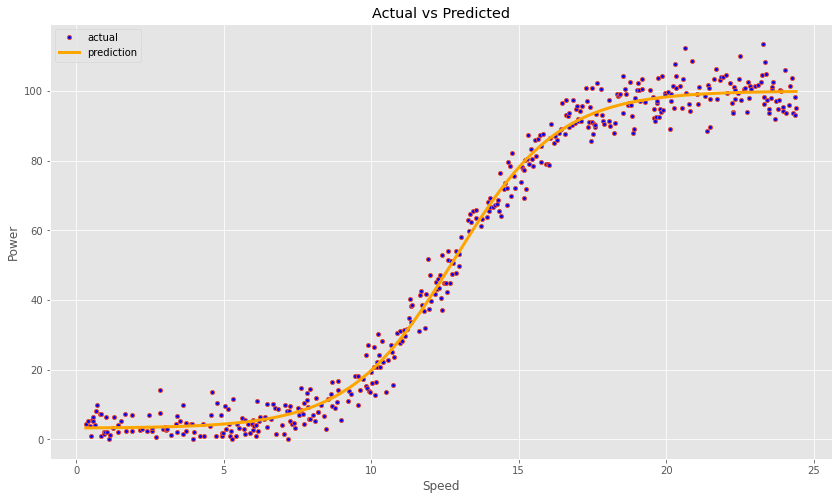

In [9]:
# Plot the predictions
plt.title('Actual vs Predicted')
plt.plot(X, y,'o',markerfacecolor='blue', markersize=4, label='actual')
plt.plot(X, y_pred,c = "orange", linewidth=3,label='prediction')
plt.xlabel("Speed")
plt.ylabel("Power")
# saving the model image to jpg
plt.savefig("Linear.png", bbox_inches='tight')
plt.legend()

In [10]:
# Take four hand-picked values and see their predictions.
model.predict([1.0,2.0,10.0,25.0])

array([[ 3.294187 ],
       [ 3.3910284],
       [19.772633 ],
       [99.87067  ]], dtype=float32)

In [11]:
# Save the model in h5 form so the data can be used in the Html File
model.save('model.h5')

### Conclusion
From Reading in the Model Data the Loss was generally okay but it could of been better. With a loss of 16.7, the prediction became better over the data. Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. Overall the results spoke for themselves.

The model uses Deep Learning framework which is Keras.

### Model References
https://androidkt.com/linear-regression-model-in-keras/
https://github.com/ianmcloughlin/jupyter-teaching-notebooks
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### References
 https://www.raeng.org.uk/publications/other/23-wind-turbine
 http://www.level.org.nz/energy/renewable-electricity-generation/wind-turbine-systems/
 http://www.ijsrp.org/research_paper_feb2012/ijsrp-feb-2012-06.pdf